In [14]:
# Exploratory Data Analysis (EDA) on Retail Sales Data

# 1. Importing Libraries1
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I want all charts a bit bigger
plt.rcParams['figure.figsize'] = (10,5)

# -----------------------------
# 2. Load the Dataset
# -----------------------------
df = pd.read_csv("E:/DA Practice/oasis infobyte/retail_data/retail_sales_dataset.csv")

print("Dataset Loaded Successfully!")
print("Shape of data:", df.shape)
df.head()


Dataset Loaded Successfully!
Shape of data: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
# -----------------------------
# 3. Data Cleaning
# -----------------------------

# Convert Date column into proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns if needed
num_cols = ['Quantity','Price per Unit','Total Amount','Age']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Checking missing values
print("Missing Values:\n", df.isnull().sum())

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Recalculate Total Amount to be safe
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

df.head()


Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [16]:
# -----------------------------
# 4. Descriptive Statistics
# -----------------------------

print("Basic Statistics for Numeric Columns:\n")
print(df.describe())

stats = {
    "Mean": df['Total Amount'].mean(),
    "Median": df['Total Amount'].median(),
    "Mode": df['Total Amount'].mode()[0],
    "Std Dev": df['Total Amount'].std()
}

print("\nMy Summary Stats:")
for k,v in stats.items():
    print(k,":",v)


Basic Statistics for Numeric Columns:

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%

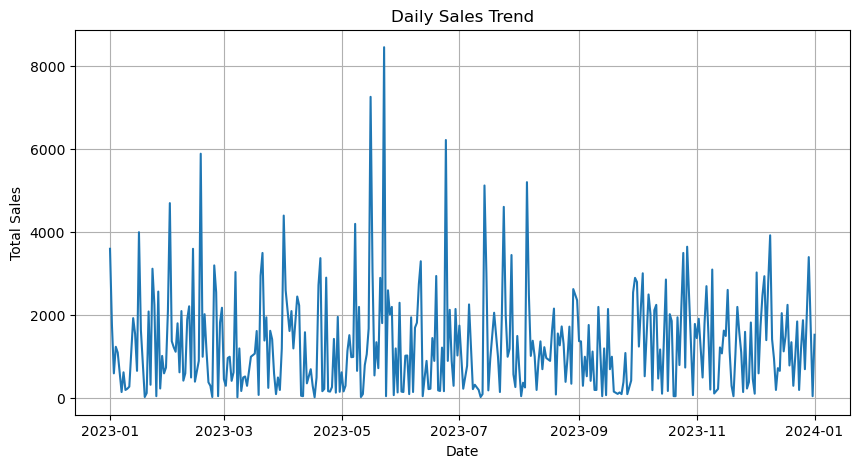

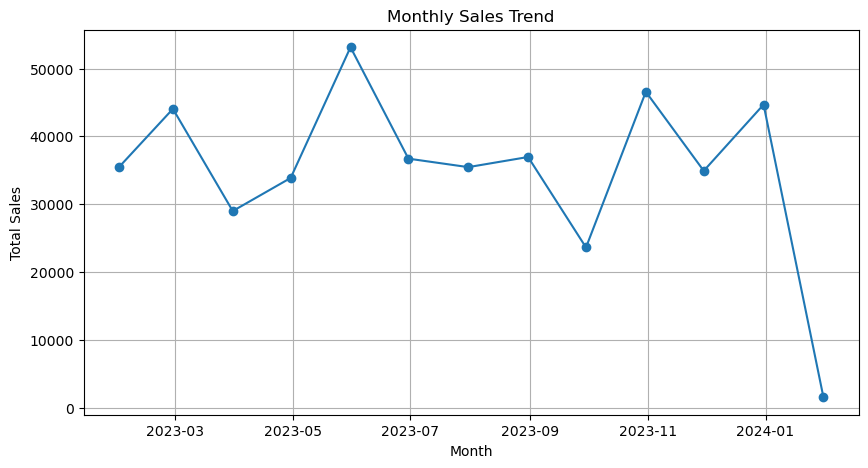

In [17]:
# -----------------------------
# 5. Time Series Analysis
# -----------------------------

# Group sales by date
daily_sales = df.groupby('Date')['Total Amount'].sum()

plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Monthly trend
monthly_sales = df.set_index("Date")['Total Amount'].resample('ME').sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


Revenue by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


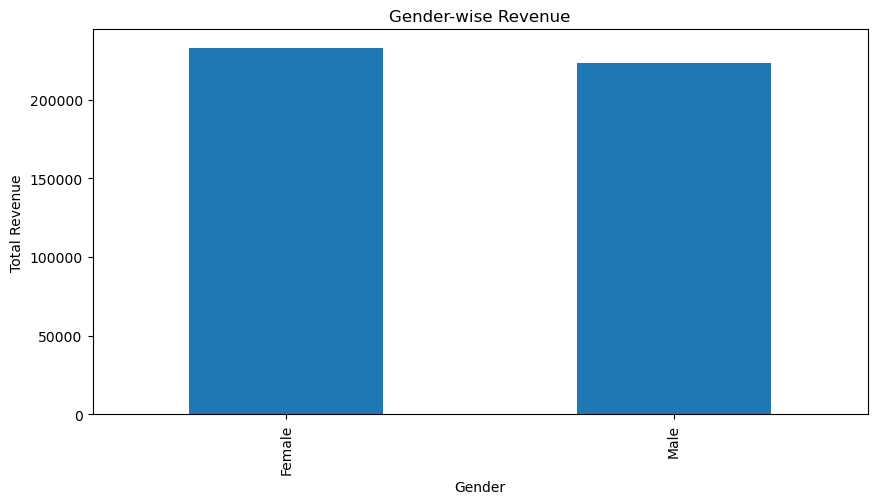

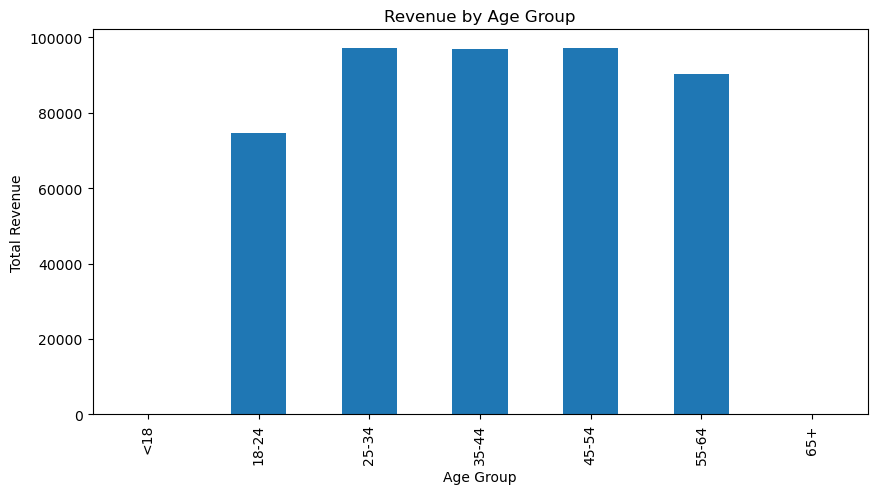

In [18]:
# -----------------------------
# 6. Customer Analysis
# -----------------------------

# Gender-wise revenue
print("Revenue by Gender:")
print(df.groupby("Gender")['Total Amount'].sum())

df.groupby("Gender")['Total Amount'].sum().plot(kind='bar')
plt.title("Gender-wise Revenue")
plt.ylabel("Total Revenue")
plt.show()

# Age group analysis
bins = [0,18,25,35,45,55,65,120]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_sales = df.groupby("Age Group", observed=False)['Total Amount'].sum()

age_group_sales.plot(kind='bar')
plt.title("Revenue by Age Group")
plt.ylabel("Total Revenue")
plt.show()


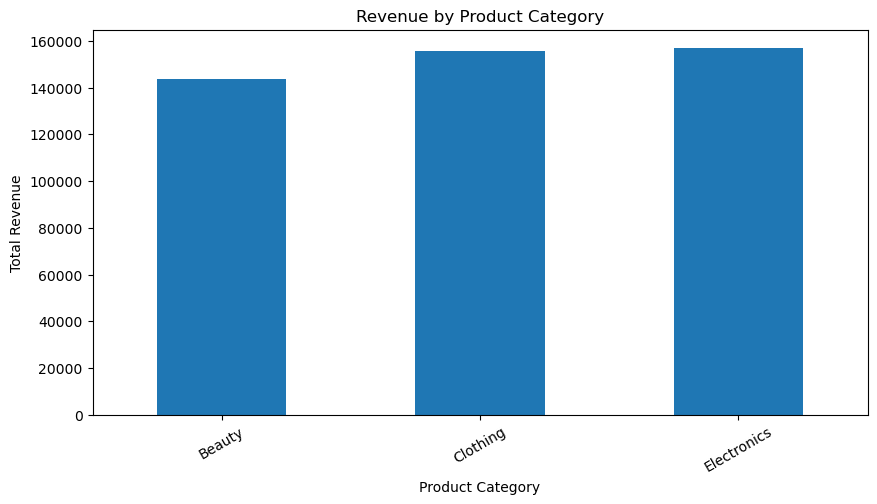

In [19]:
# -----------------------------
# 7. Product Analysis
# -----------------------------

# Category revenue
cat_sales = df.groupby("Product Category")['Total Amount'].sum()

cat_sales.plot(kind='bar')
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.show()


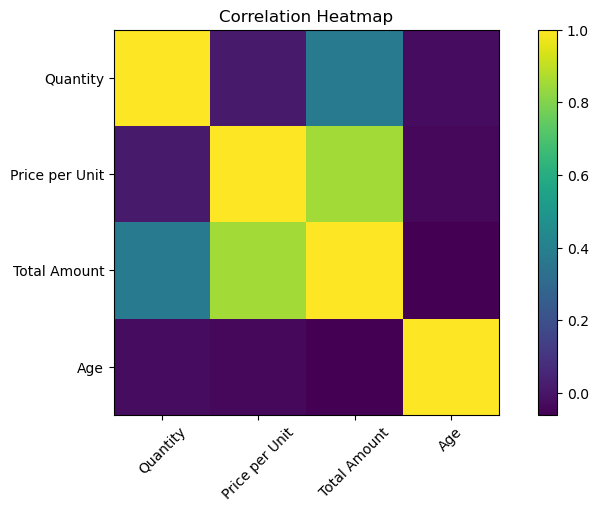

In [20]:
# -----------------------------
# 8. Correlation Heatmap
# -----------------------------
numeric_data = df[['Quantity','Price per Unit','Total Amount','Age']].corr()

plt.imshow(numeric_data, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(numeric_data.columns)), numeric_data.columns, rotation=45)
plt.yticks(range(len(numeric_data.columns)), numeric_data.columns)
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# -----------------------------
# 9. Key Recommendations
# -----------------------------

print("""
--------------------------
FINAL RECOMMENDATIONS
--------------------------

1. Top product categories can be targeted with discounts or bundles.
2. Monthly sales trend shows peaks — marketing should match these seasons.
3. Gender/age-based promotions can increase conversion.
4. High-value customers can be targeted with loyalty programs.
5. Recalculate Total Amount column always to avoid wrong billing.
6. Need to ensure missing values are validated at data entry level.
7. Consider doing RFM analysis, forecasting and basket analysis for deeper insights.

""")



--------------------------
FINAL RECOMMENDATIONS
--------------------------

1. Top product categories can be targeted with discounts or bundles.
2. Monthly sales trend shows peaks — marketing should match these seasons.
3. Gender/age-based promotions can increase conversion.
4. High-value customers can be targeted with loyalty programs.
5. Recalculate Total Amount column always to avoid wrong billing.
6. Need to ensure missing values are validated at data entry level.
7. Consider doing RFM analysis, forecasting and basket analysis for deeper insights.


